#### Prerequisites

- Basic familiarity with [Numpy](https://numpy.org/doc/stable/user/quickstart.html)
- Basic familiarity with [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) 

## Outline

- [Section 1](#section-1): Intro to Linear Regression
- [Section 2](#section-2): Least Squared Loss and Maximum Liklihood
- [Section 3](#section-3): Ridge Regression


# Linear Regression


<a name="section-1"></a>

##  Section 1: Intro to Linear regression

*Partly adapted from [Deisenroth, Faisal, Ong (2020)](https://mml-book.github.io/).*

The purpose of this notebook is to practice implementing some linear algebra (equations provided) and to explore some properties of linear regression.

We will solely rely on the Python packages numpy and matplotlib, and you are not allowed to use any package that has a complete linear regression framework implemented (e.g., scikit-learn).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\beta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\beta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this tutorial, we are interested in finding parameters $\boldsymbol\beta$ that map the inputs well to the ouputs.

### Dataset generation

We will start with a simple training set, that we define by ourselves.

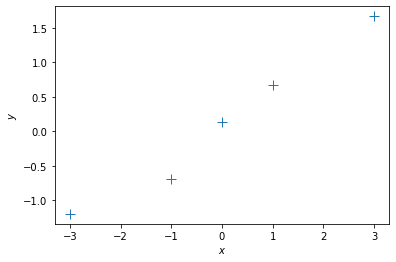

In [2]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

<a name="section-2"></a>

## Section 2: Least squares loss and Maximum likelihood

From our lectures, we know that the parameters $\boldsymbol\beta$ found by optimizing following equation:
$$
\underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{LS}} (\boldsymbol\beta)
$$
where $\text{L}_{\text{LS}}$ is the (ordinary) least squares loss function. The solution is
$$
\boldsymbol\beta^{*} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \ \in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$


The same estimate of $\boldsymbol\beta$ we can be obtained by maximum liklihood estimation which gives statistical interpretation of linear regression. In maximum likelihood estimation, we can find the parameters $\boldsymbol\beta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\beta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\beta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\beta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

Let us compute the maximum likelihood estimate for the given training set.

In [3]:
## EDIT THIS FUNCTION
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    beta_ml = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return beta_ml

In [4]:
# get maximum likelihood estimate
beta_ml = max_lik_estimate(X,y)

Now, make a prediction using the maximum likelihood estimate that we just found.

In [5]:
## EDIT THIS FUNCTION
def predict_with_estimate(X_test, beta):
    
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector

    prediction = np.dot(X_test, beta)
    
    return prediction 

Let's see whether we got something useful:

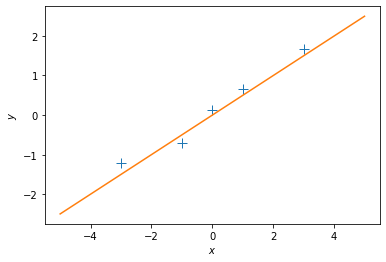

In [6]:
# define a test set
X_test = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(X_test, beta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(X_test, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Questions
1. Does the solution above look reasonable?


Yes, the data fits a linear model going through the origin well


2. Play around with different values of $\beta$. How do the corresponding functions change?


The $\beta$ values change the gradient of the line produced


3. Modify the training targets $\mathcal Y$ and re-run your computation. What changes?


It will always produce the maximum likelihood estimate for $\beta$ within the model that is a linear model through the origin. So when using y values that don't fit throug the orgin or a linear fit, the model won't work as well as the one above.


Let us now look at a different training set, where we add 2.0 to every $y$-value, and compute the maximum likelihood estimate.

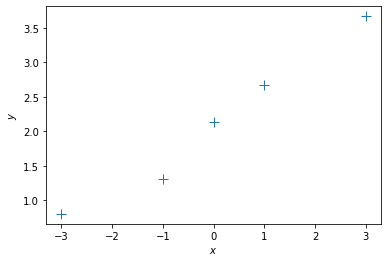

In [7]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

[[0.499]]


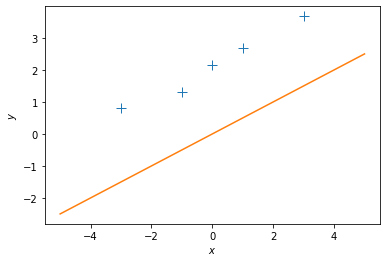

In [8]:
# get maximum likelihood estimate
beta_ml = max_lik_estimate(X, ynew)
print(beta_ml)

# define a test set
X_test = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(X_test, beta_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(X_test, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Question:
1. This maximum likelihood estimate doesn't look too good: The orange line is too far away from the observations although we just shifted them by 2. Why is this the case?


Because our model is only a linear fit through the origin and such when x is 0, y is also 0, and such the solution for the maximum likelihood will be a similar line to the first problem because then it is only 2 away on all the points instead of being further on some if one tries to meet the points


2. How can we fix this problem?


We can add another beta parameter to include the y intercept for the linear model so it can shift the line up and down

Let us now define a linear regression model that is slightly more flexible:
$$
y = \beta_0 + \boldsymbol x^T \boldsymbol\beta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$

Here, we added an offset (also called intercept) parameter $\beta_0$ to our original model.

#### Question:
1. What is the effect of this bias parameter, i.e., what additional flexibility does it offer?


It allows the model line found to be shifted up and down so that it doesn't have to go through the origin


If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as 
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\beta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\beta_{\text{aug}} = \begin{bmatrix}
\beta_0\\
\boldsymbol\beta_1
\end{bmatrix}\,.
$$

In [9]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
beta_aug = np.zeros((D+1, 1)) # new beta vector of size (D+1) x 1

Let us now compute the maximum likelihood estimator for this setting.

_Hint:_ If possible, re-use code that you have already written.

In [10]:
## EDIT THIS FUNCTION
def max_lik_estimate_aug(X_aug, y):
    
    beta_aug_ml = np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)), np.dot(X_aug.T, y))
    
    return beta_aug_ml

In [11]:
beta_aug_ml = max_lik_estimate_aug(X_aug, y)

Now, we can make predictions again:

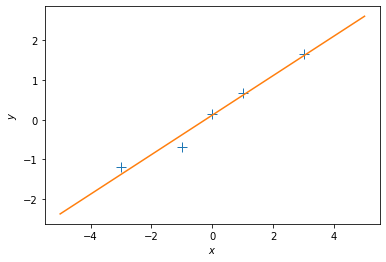

In [12]:
# define a test set (we also need to augment the test inputs with ones)
X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(X_test_aug, beta_aug_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(X_test, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

It seems this has solved our problem! 
#### Question:
1. Play around with the first parameter of $\boldsymbol\beta_{\text{aug}}$ and see how the fit of the function changes.

The first parameter $\beta_0$ changes the y intercept

2. Play around with the second parameter of $\boldsymbol\beta_{\text{aug}}$ and see how the fit of the function changes.

The second parameter $\beta_1$ changes the gradient as it did before 

<a name="section-3"></a>

## Section 3: Ridge regression

From our lectures, we know that ridge regression is an extension of linear regression with least squares loss function, including a (usually small) positive penalty term $\lambda$:
$$
\underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{ridge}} (\boldsymbol\beta)
$$
where $\text{L}_{\text{ridge}}$ is the ridge loss function. The solution is
$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$


This time, we will define a very small training set of only two observations to demonstrate the advantages of ridge regression over least squares linear regression.



In [13]:
X_train = np.array([0.5, 1]).reshape(-1,1)
y_train = [0.5, 1]
X_test = np.array([0, 2]).reshape(-1,1)

Let's define function similar to the one for least squares, but taking one additional argument, our penalty term $\lambda$. 

_Hint_: we apply the same augmentation as above with least squares, so the offset is accurately captured.

In [14]:
## EDIT THIS FUNCTION
def ridge_estimate(X, y, penalty):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # penalty: float
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    N_aug, D_aug = X_aug.shape
    I = np.identity(D_aug)
    beta_ridge = np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug) + penalty*I), np.dot(X_aug.T, y))
    
    return beta_ridge

Now, we add a bit of Gaussian noise to our training set and apply ridge regression. We should do it a couple of times to be sure about the results (here 10 times).

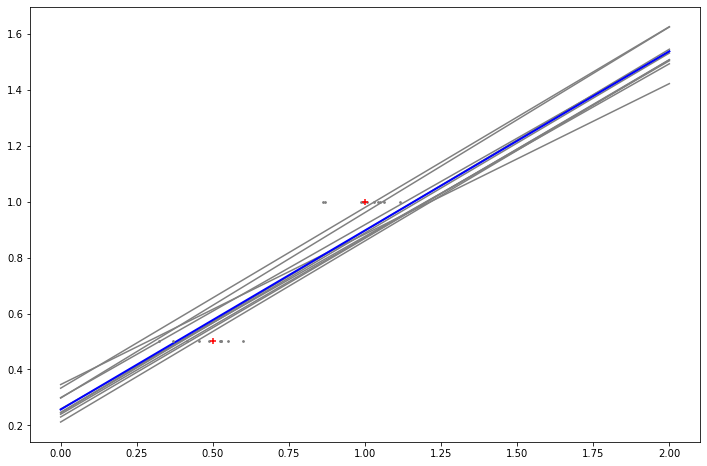

In [15]:
penalty_term = 0.1
fig, ax = plt.subplots(figsize=(12, 8))
X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test])

for _ in range(10):
  this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train

  beta_ridge = ridge_estimate(this_X, y_train, penalty=penalty_term)
  ridge_prediction = predict_with_estimate(X_test_aug, beta_ridge)

  ax.plot(X_test, ridge_prediction, color='gray')
  ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

beta_ridge = ridge_estimate(X_train, y_train, penalty=penalty_term)
ridge_prediction_X = predict_with_estimate(X_test_aug, beta_ridge)

ax.plot(X_test, ridge_prediction_X, linewidth=2, color='blue')
ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10);

Let's compare this to ordinary least squares:

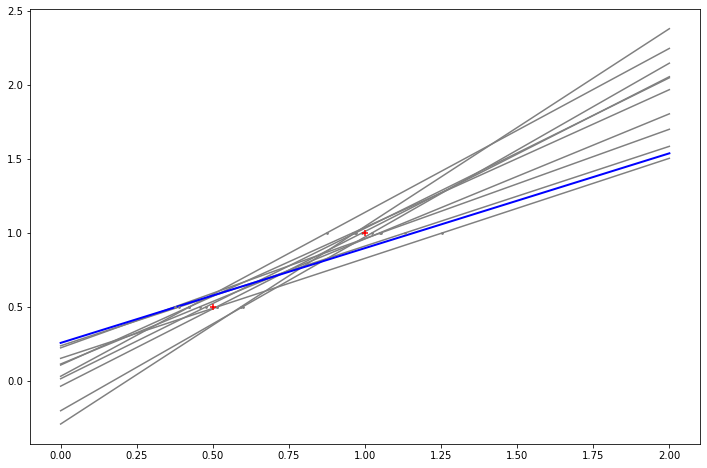

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test])

for _ in range(10):
  this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
  N, D = this_X.shape
  this_X_aug = np.hstack([np.ones((N,1)), this_X])

  beta_aug_ml = max_lik_estimate_aug(this_X_aug, y_train)
  ml_prediction = predict_with_estimate(X_test_aug, beta_aug_ml)

  ax.plot(X_test, ml_prediction, color='gray')
  ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

beta_aug_ml = max_lik_estimate_aug(X_train, y_train)
ml_prediction_X = predict_with_estimate(X_test_aug, beta_ridge)

ax.plot(X_test, ml_prediction_X, linewidth=2, color='blue')
ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10);

#### Questions
1. What differences between the two solutions above can you see?

First difference is that running both multiple times, the ridge regression has a more consistent result, and such all solutions will be roughly parallel, however the ordinary maximum likelihood can produce some more wild results, with varying gradients

2. Play around with different values of the penalty term $\lambda$. How do the corresponding functions change? Which values provide the most reasonable results?

When decreasing the penalty term, it becomes more like ordinary least squares, however when increasing it, the results become very consistent, but for a worse fit. Around 0.1 is a good value for this problem

3. Can you replicate your results using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)?
4. Based on sklearn's documentation, can you see any differences in the algorithms that are implemented in sklearn?

In [21]:
import sklearn.linear_model as sk

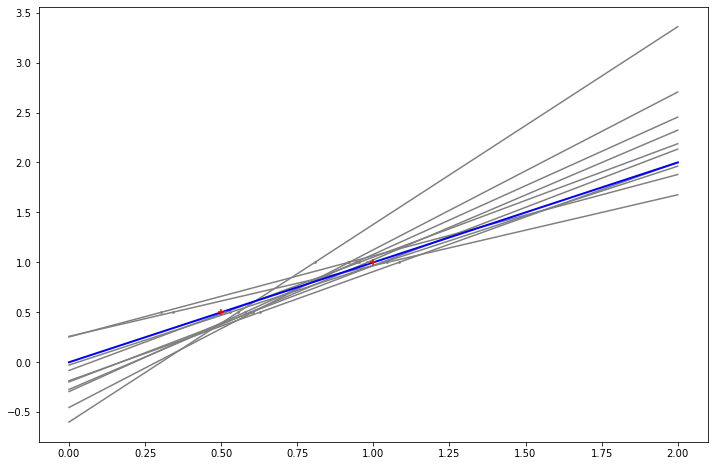

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

for _ in range(10):
  this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
  N, D = this_X.shape

  this_X_sk_ord = sk.LinearRegression().fit(this_X, y_train)
  sk_ord_pred = this_X_sk_ord.predict(X_test)

  ax.plot(X_test, sk_ord_pred, color='gray')
  ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

X_sk_ord = sk.LinearRegression().fit(X_train, y_train)
sk_ord_pred_X = X_sk_ord.predict(X_test)

ax.plot(X_test, sk_ord_pred_X, linewidth=2, color='blue')
ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10);

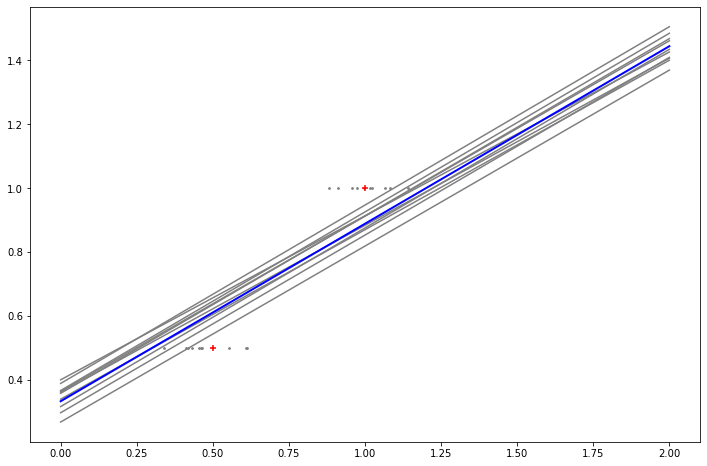

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

penalty = 0.1

for _ in range(10):
  this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
  N, D = this_X.shape

  this_X_sk_ord = sk.Ridge(penalty).fit(this_X, y_train)
  sk_ord_pred = this_X_sk_ord.predict(X_test)

  ax.plot(X_test, sk_ord_pred, color='gray')
  ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

X_sk_ord = sk.Ridge(penalty).fit(X_train, y_train)
sk_ord_pred_X = X_sk_ord.predict(X_test)

ax.plot(X_test, sk_ord_pred_X, linewidth=2, color='blue')
ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10);